## K-Mediods Algorithm Implementation

In [1]:
# Add Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import pairwise_distances
from sklearn.preprocessing import StandardScaler
import os

In [2]:
# Create the results directory if it doesn't exist
results_directory = "./../results"
if not os.path.exists(results_directory):
    os.makedirs(results_directory)
    
dataset_path = "./../datasets"

iris_dataset_path = dataset_path + "/iris.csv"                                         
ai_global_index_path = dataset_path + "/AI_index_db.csv"
global_earthquake_data_path = dataset_path + "/earthquakes.csv"


In [3]:
# Read datasets into pandas DataFrames
iris_data = pd.read_csv(iris_dataset_path)
ai_index_data = pd.read_csv(ai_global_index_path)
earthquake_data = pd.read_csv(global_earthquake_data_path)

# Dictionary to hold datasets
datasets = {
    "iris": iris_data,
    "ai_global_index": ai_index_data,
    "global_earthquake": earthquake_data
}

In [4]:
# Custom K-Medoids Implementation
class CustomKMedoids:
    def __init__(self, num_clusters=3, max_iterations=100, tolerance=1e-4):
        """
        Initialize K-Medoids clustering.

        Parameters:
        - num_clusters: Number of clusters (default: 3).
        - max_iterations: Maximum number of iterations (default: 100).
        - tolerance: Tolerance for convergence (default: 1e-4).
        """
        self.num_clusters = num_clusters
        self.max_iterations = max_iterations
        self.tolerance = tolerance
        self.medoids = None
        self.cluster_labels = None

    def fit(self, data):
        """
        Fit the K-Medoids algorithm to the dataset.

        Parameters:
        - data: Input data (numpy array or pandas DataFrame).
        """
        num_samples, num_features = data.shape

        # Step 1: Randomly initialize medoids
        self.medoids = data[np.random.choice(num_samples, self.num_clusters, replace=False)]

        # Initialize total cost
        total_cost = self._calculate_total_cost(data, self.medoids)

        for iteration in range(self.max_iterations):
            # Step 2: Assign each point to the nearest medoid
            distances = pairwise_distances(data, self.medoids)
            self.cluster_labels = np.argmin(distances, axis=1)

            # Step 3: Update medoids
            new_medoids = self.medoids.copy()
            for medoid_index in range(self.num_clusters):
                # Get points assigned to the current medoid
                cluster_points = data[self.cluster_labels == medoid_index]

                # Compute the cost of swapping the medoid with each non-medoid point
                min_cost = np.inf
                best_candidate = None

                for candidate_index in range(len(cluster_points)):
                    # Swap medoid with candidate
                    candidate = cluster_points[candidate_index]
                    temp_medoids = new_medoids.copy()
                    temp_medoids[medoid_index] = candidate

                    # Compute new total cost
                    new_cost = self._calculate_total_cost(data, temp_medoids)

                    # Update if the new cost is better
                    if new_cost < min_cost:
                        min_cost = new_cost
                        best_candidate = candidate

                # Update medoid if a better candidate is found
                if best_candidate is not None:
                    new_medoids[medoid_index] = best_candidate

            # Step 4: Check for convergence
            new_total_cost = self._calculate_total_cost(data, new_medoids)
            if abs(total_cost - new_total_cost) < self.tolerance:
                break

            # Update medoids and total cost
            self.medoids = new_medoids
            total_cost = new_total_cost

    def _calculate_total_cost(self, data, medoids):
        """
        Compute the total cost of the current medoids.

        Parameters:
        - data: Input data.
        - medoids: Current medoids.

        Returns:
        - Total cost (sum of distances to the nearest medoid).
        """
        distances = pairwise_distances(data, medoids)
        return np.sum(np.min(distances, axis=1))

    def predict(self, data):
        """
        Predict the closest cluster for each sample in the data.

        Parameters:
        - data: Input data.

        Returns:
        - Cluster labels.
        """
        distances = pairwise_distances(data, self.medoids)
        return np.argmin(distances, axis=1)



Processing iris dataset
Medoids for iris:
[[-0.17367395 -0.58776353  0.42156442  0.13322594]
 [ 1.15917263 -0.1249576   0.99022146  1.1850097 ]
 [-1.02184904  0.80065426 -1.2844067  -1.31297673]]
Cluster labels for iris:
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0
 0 1 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 1 1 1 1
 1 1 0 1 1 1 1 1 0 1 0 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 1
 1 0]


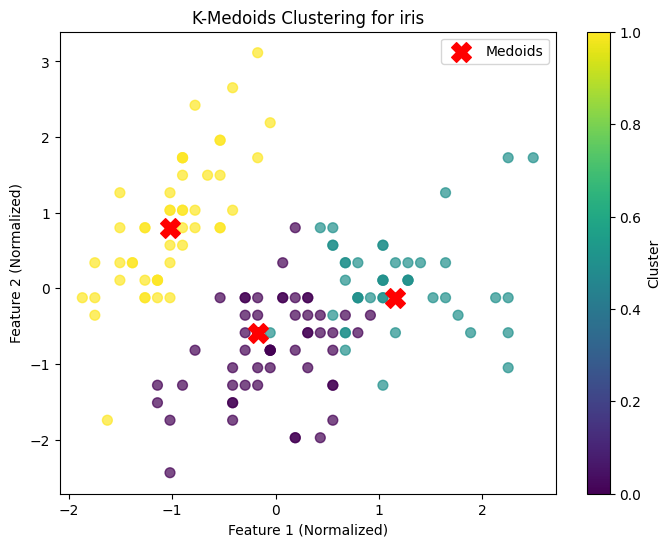


Processing ai_global_index dataset
Medoids for ai_global_index:
[[-0.37722993  0.03771304  0.50631495 -0.30973214 -0.62945982  0.47712806
  -0.31775841 -0.24029379]
 [ 0.71740696  0.68397403  0.16606701  1.11329889  0.51735564  1.02859001
   0.15220322  0.80829418]
 [-0.89075511 -0.9286865  -0.34052436 -0.87709195 -0.76703615 -1.61159168
  -0.4363267  -1.00290323]]
Cluster labels for ai_global_index:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 2
 0 0 2 0 0 0 0 0 0 2 0 0 2 2 0 2 2 2 2 2 2 2 2 2 2]


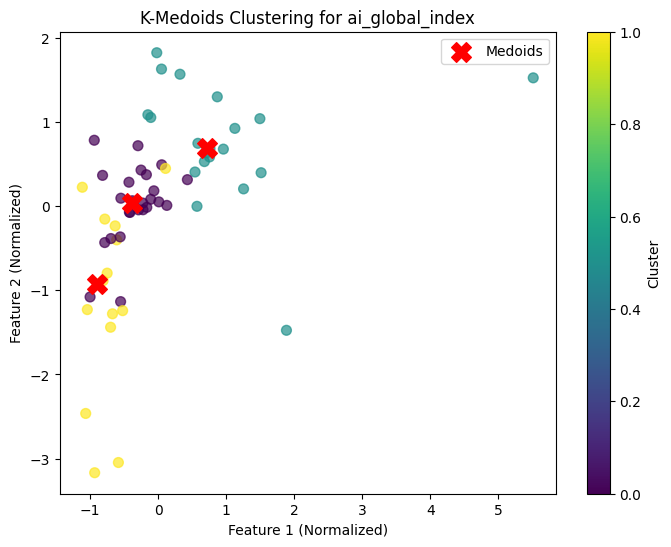


Processing global_earthquake dataset
Medoids for global_earthquake:
[[-1.78348297 -1.00442587 -0.92517322 -0.26268959 -0.42111131 -0.3928371
  -0.4152274  -1.26239636 -0.72144315 -0.19027888 -0.30243869  0.66730914
  -0.43540653 -1.09850488  0.55809736 -0.88939904 -0.10722068 -0.15851066]
 [ 1.00930556  0.56804847  0.82513919 -0.176938    0.68025673 -0.3928371
  -0.4152274   1.21260044 -0.45614454 -0.19027888  0.04791618 -0.00861472
  -0.51571759 -0.24456073  0.33049806  0.34697169 -0.01294905  0.91936181]
 [-0.94564641  0.72361482  0.77273741 -0.25195965 -0.42111131 -0.3928371
  -0.4152274  -0.69804269  0.56083346 -0.40473261 -0.33747418 -1.18021606
   0.78225259  0.29154413 -1.23936661  0.86212616  0.90674968 -1.23638312]]
Cluster labels for global_earthquake:
[1 1 2 2 2 2 2 2 1 1 1 2 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 2 2 2 2 2 2 1
 1 2 1 1 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0]


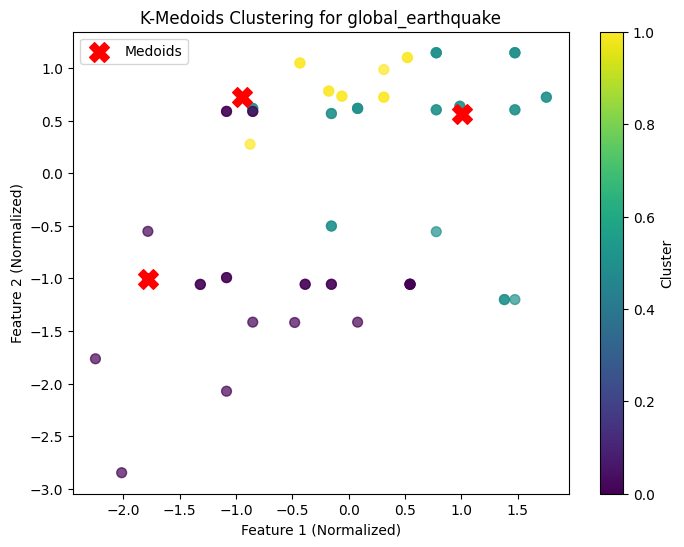

In [5]:
# Process datasets
results = {}

for dataset_name, dataset in datasets.items():
    print(f"\nProcessing {dataset_name} dataset")

    # Handle missing values
    dataset = dataset.dropna()  # Remove rows with missing values

    # Select only numeric columns
    numeric_data = dataset.select_dtypes(include=[np.number]).values

    # Normalize data
    normalized_data = StandardScaler().fit_transform(numeric_data)

    # Run custom K-Medoids
    kmedoids = CustomKMedoids(num_clusters=3, max_iterations=100, tolerance=1e-4)
    kmedoids.fit(normalized_data)
    cluster_labels = kmedoids.cluster_labels

    # Print medoids and labels
    print(f"Medoids for {dataset_name}:")
    print(kmedoids.medoids)
    print(f"Cluster labels for {dataset_name}:")
    print(cluster_labels)

    # Save results
    results[dataset_name] = {
        "medoids": kmedoids.medoids,
        "labels": cluster_labels
    }

    # Visualize clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(normalized_data[:, 0], normalized_data[:, 1], c=cluster_labels, cmap="viridis", s=50, alpha=0.7)
    plt.scatter(kmedoids.medoids[:, 0], kmedoids.medoids[:, 1], c="red", marker="X", s=200, label="Medoids")
    plt.title(f"K-Medoids Clustering for {dataset_name}")
    plt.xlabel("Feature 1 (Normalized)")
    plt.ylabel("Feature 2 (Normalized)")
    plt.legend()
    plt.colorbar(label="Cluster")
    plt.show()

In [6]:
# Save results to CSV
results_df = pd.DataFrame(results)
results_df.to_csv("./../results/kmedoids_results.csv")